# HW7

# Student Name: Hung Yi-Le

# USC ID: 3941176047

# GITHUB: ZackLa

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.spatial.distance import hamming
from sklearn.metrics import hamming_loss

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines
# (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
df1 = df.copy()

In [3]:
df = df.drop(columns = "RecordID")

In [4]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [5]:
y = df.iloc[:,22:]

In [6]:
x = df.iloc[:,:22]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multiclass and multilabel problem. One of the most important approaches to multilabel classification is to train a classifier for each label (binary relevance). We first try this approach:
## i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

### Exact match is do the prediction perfectly, which mean 0 error. Whereas hamming score is error all the proportion of all the multilabels.

## ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [9]:
np.linspace(0.0000001,10,10)

array([1.0000000e-07, 1.1111112e+00, 2.2222223e+00, 3.3333334e+00,
       4.4444445e+00, 5.5555556e+00, 6.6666667e+00, 7.7777778e+00,
       8.8888889e+00, 1.0000000e+01])

In [10]:
model = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovr')
parameters = {'C':[0.01, 10, 100, 1000, 10000],'gamma' :np.linspace(0.0000001,10,10)}
clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10))
clf.fit(x_train, y_train['Family'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 10, 100, 1000, 10000],
                         'gamma': array([1.0000000e-07, 1.1111112e+00, 2.2222223e+00, 3.3333334e+00,
       4.4444445e+00, 5.5555556e+00, 6.6666667e+00, 7.7777778e+00,
       8.8888889e+00, 1.0000000e+01])},
             scoring='accuracy')

In [11]:
# Exact Match
clf.score(x_test, y_test['Family'])

0.9949050486336267

In [12]:
y_pred = clf.predict(x_test)
# Hamming loss
hamming_loss(y_test['Family'], y_pred)

0.005094951366373321

In [13]:
# Hamming score
1 - hamming_loss(y_test['Family'], y_pred)

0.9949050486336267

In [14]:
clf.best_params_

{'C': 10, 'gamma': 2.2222223}

### The weight of the SVM penalty for Fmaily label is 10, and the width is about Exact match 0.9949050486336267, hamming loss is abuot 0.005094951366373321, hamming score is about 0.9949050486336267


In [15]:
clf.fit(x_train, y_train['Genus'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 10, 100, 1000, 10000],
                         'gamma': array([1.0000000e-07, 1.1111112e+00, 2.2222223e+00, 3.3333334e+00,
       4.4444445e+00, 5.5555556e+00, 6.6666667e+00, 7.7777778e+00,
       8.8888889e+00, 1.0000000e+01])},
             scoring='accuracy')

In [16]:
#Exact Match
clf.score(x_test, y_test['Genus'])

0.9893469198703103

In [17]:
y_pred = clf.predict(x_test)
# Hamming Loss
hamming_loss(y_test['Genus'], y_pred)

0.010653080129689671

In [18]:
# Hamming Score
1 - hamming_loss(y_test['Genus'], y_pred)

0.9893469198703103

In [19]:
clf.best_params_

{'C': 10, 'gamma': 2.2222223}

### The weight of the SVM penalty for Fmaily label is 10, and the width is about Exact match 0.9893469198703103, hamming loss is abuot 0.010653080129689671, hamming score is about 0.9893469198703103.


In [20]:
clf.fit(x_train, y_train['Species'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 10, 100, 1000, 10000],
                         'gamma': array([1.0000000e-07, 1.1111112e+00, 2.2222223e+00, 3.3333334e+00,
       4.4444445e+00, 5.5555556e+00, 6.6666667e+00, 7.7777778e+00,
       8.8888889e+00, 1.0000000e+01])},
             scoring='accuracy')

In [21]:
# Exact Match
clf.score(x_test, y_test['Species'])

0.9879573876794813

In [22]:
y_pred = clf.predict(x_test)
# Hamming Loss
hamming_loss(y_test['Species'], y_pred)

0.012042612320518759

In [23]:
# Hamming Score
1 - hamming_loss(y_test['Species'], y_pred)

0.9879573876794813

In [24]:
clf.best_params_

{'C': 10, 'gamma': 3.3333334}

### The weight of the SVM penalty for Fmaily label is 10, and the width is about Exact match 0.9879573876794813, hamming loss is abuot 0.012042612320518759, hamming score is about 0.9879573876794813

## iii. Repeat 1(b)ii with L1-penalized SVM. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [25]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [26]:
scale = StandardScaler()
sx_train = scale.fit_transform(x_train)
sx_test = scale.fit_transform(x_test)

In [27]:
model1 = LinearSVC(penalty = 'l1', dual = False, max_iter = 700000)
parameters = {'C':[0.01, 10, 100, 1000, 10000]}
clf1 = GridSearchCV(model1, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10))

In [28]:
clf1.fit(sx_train, y_train['Family'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=700000, penalty='l1'),
             param_grid={'C': [0.01, 10, 100, 1000, 10000]},
             scoring='accuracy')

In [29]:
clf1.score(sx_test, y_test['Family'])

0.9258916164891153

In [30]:
y_pred = clf1.predict(sx_test)
# Hamming Loss
hamming_loss(y_test['Family'], y_pred)

0.07410838351088467

In [31]:
#Hamming Score
1 - hamming_loss(y_test['Family'], y_pred)

0.9258916164891153

In [32]:
clf1.best_params_

{'C': 10}

### The weight of the L1-penalized SVM penalty for Fmaily label is 10. Exact match 0.9258916164891153, hamming loss is abuot 0.07410838351088467, hamming score is about 0.9258916164891153

In [33]:
clf1.fit(sx_train, y_train['Genus'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=700000, penalty='l1'),
             param_grid={'C': [0.01, 10, 100, 1000, 10000]},
             scoring='accuracy')

In [34]:
# Exact Match
clf1.score(sx_test, y_test['Genus'])

0.9388605836035201

In [35]:
y_pred = clf1.predict(sx_test)
# Hamming Loss
hamming_loss(y_test['Genus'], y_pred)

0.06113941639647985

In [36]:
# Hamming Score
1 - hamming_loss(y_test['Genus'], y_pred)

0.9388605836035202

In [37]:
clf1.best_params_

{'C': 10}

### The weight of the L1-penalized SVM penalty for Genus label is 10. Exact match 0.9388605836035201, hamming loss is abuot 0.06113941639647985, hamming score is about 0.9388605836035202

In [38]:
clf1.fit(sx_train, y_train['Species'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=700000, penalty='l1'),
             param_grid={'C': [0.01, 10, 100, 1000, 10000]},
             scoring='accuracy')

In [39]:
clf1.score(sx_test, y_test['Species'])

0.9592403890690134

In [40]:
y_pred = clf1.predict(sx_test)
# Hamming Loss
hamming_loss(y_test['Species'], y_pred)

0.04075961093098657

In [41]:
#Hamming Score
1 - hamming_loss(y_test['Species'], y_pred)

0.9592403890690134

In [42]:
clf1.best_params_

{'C': 10}

### The weight of the L1-penalized SVM penalty for Species label is 10. Exact match 0.9592403890690134, hamming loss is abuot 0.04075961093098657, hamming score is about 0.9592403890690134

## iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(sx_train, y_train['Family'])
model1 = LinearSVC(penalty = 'l1', dual = False, max_iter = 700000, random_state = 42, tol = 0.1)
parameters = {'C':[0.01, 10, 100, 1000, 10000]}
clf2 = GridSearchCV(model1, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10))

In [45]:
clf2.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=700000, penalty='l1',
                                 random_state=42, tol=0.1),
             param_grid={'C': [0.01, 10, 100, 1000, 10000]},
             scoring='accuracy')

In [46]:
clf2.score(sx_test, y_test['Family'])

0.889763779527559

In [47]:
y_pred = clf2.predict(sx_test)
# Hamming Loss
hamming_loss(y_test['Family'], y_pred)

0.11023622047244094

In [48]:
#Hamming Score
1 - hamming_loss(y_test['Family'], y_pred)

0.889763779527559

In [49]:
clf2.best_params_

{'C': 100}

### The weight of the SMOTE penalty for Fmaily label is 10. Exact match 0.8851320055581288, hamming loss is abuot 0.11486799444187124, hamming score is about 0.8851320055581288

In [50]:
x_train_smote, y_train_smote = smote.fit_resample(sx_train, y_train['Genus'])
clf2.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=700000, penalty='l1',
                                 random_state=42, tol=0.1),
             param_grid={'C': [0.01, 10, 100, 1000, 10000]},
             scoring='accuracy')

In [51]:
clf2.score(sx_test, y_test['Genus'])

0.8994905048633627

In [52]:
y_pred = clf2.predict(sx_test)
# Hamming Loss
hamming_loss(y_test['Genus'], y_pred)

0.10050949513663733

In [53]:
1 - hamming_loss(y_test['Genus'], y_pred)

0.8994905048633627

In [54]:
clf2.best_params_

{'C': 10}

### The weight of the SMOTE penalty for Genus label is 10. Exact match 0.9004168596572487, hamming loss is abuot 0.09958314034275127, hamming score is about 0.9004168596572487

In [55]:
x_train_smote, y_train_smote = smote.fit_resample(sx_train, y_train['Species'])
clf2.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=700000, penalty='l1',
                                 random_state=42, tol=0.1),
             param_grid={'C': [0.01, 10, 100, 1000, 10000]},
             scoring='accuracy')

In [56]:
clf2.score(sx_test, y_test['Species'])

0.9555349698934692

In [57]:
y_pred = clf2.predict(sx_test)
# Hamming Loss
hamming_loss(y_test['Species'], y_pred)

0.0444650301065308

In [58]:
# Hamming Score
1 - hamming_loss(y_test['Species'], y_pred)

0.9555349698934692

In [59]:
clf2.best_params_

{'C': 100}

### The weight of the SMOTE penalty for Genus label is 100. Exact match 0.9555349698934692, hamming loss is abuot 0.04492820750347383, hamming score is about 0.9555349698934692

# 2. K-Means Clustering on a MultiClass and MultiLabel Data Set MonteCarlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

## (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import hamming

In [61]:
df['klabel'] = list(range(1,7196,1))
df['Family'] = df1['Family']
df['Genus'] = df1['Genus']
df['Species'] = df1['Species']

In [62]:
df4 = pd.DataFrame()
for p in list(range(1,51,1)):
    sils = []
    k = []
    r = []
    avg = []
    std = []
    df3 = pd.DataFrame()
    for i in list(range(2,51,1)):
        kmeans = KMeans(n_clusters = i, random_state = p).fit(x)
        score = silhouette_score(x, kmeans.labels_)
        sils.append(score)
        k.append(i)
        r.append(p)
    
    df3 = df3.assign(K = k, Score = sils, random_state = p)
    df4 = pd.concat([df4, df3[df3.Score == df3.Score.max()]])

In [63]:
df4 = df4.reset_index()
df4 = df4.drop(columns = 'index')

In [64]:
F_ham = []
G_ham = []
S_ham = []
majority = []
for p in list(range(1,51,1)):
    kmeans = KMeans(n_clusters = df4['K'][p-1], random_state = p).fit(x)
    
    df['klabel'] = kmeans.labels_
    df000 = df.groupby(['klabel'])[['Family', 'Genus', 'Species']].agg(lambda x:x.value_counts().index[0])
    condition = [(df['klabel'] == 0), (df['klabel'] == 1), (df['klabel'] == 2), (df['klabel'] == 3)]
    value1 = [df000['Family'][0], df000['Family'][1], df000['Family'][2], df000['Family'][3]]
    value2 = [df000['Genus'][0], df000['Genus'][1], df000['Genus'][2], df000['Genus'][3]]
    value3 = [df000['Species'][0], df000['Species'][1], df000['Species'][2], df000['Species'][3]]
    df['Family_M'] = np.select(condition, value1)
    df['Genus_M'] = np.select(condition, value2)
    df['Species_M'] = np.select(condition, value3)
    
    majority.append(df000)
    F_ham.append(hamming(df['Family'], df['Family_M']))
    G_ham.append(hamming(df['Genus'], df['Genus_M']))
    S_ham.append(hamming(df['Species'], df['Species_M']))


In [65]:
df4 = df4.assign(F_HAM = F_ham, G_HAM = G_ham, S_HAM = S_ham)

In [66]:
df4['Ham'] = (df4['F_HAM'] + df4['G_HAM'] + df4['S_HAM'])
df4['Ham_Loss'] = (df4['F_HAM'] + df4['G_HAM'] + df4['S_HAM'])/3
df4['Ham_Score'] = 1 - df4['Ham_Loss']

In [67]:
df4

,K,Score,random_state,F_HAM,G_HAM,S_HAM,Ham,Ham_Loss,Ham_Score
0,4,0.378751,1,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
1,4,0.385234,2,0.164281,0.254343,0.317165,0.735789,0.245263,0.754737
2,4,0.378751,3,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
3,4,0.378751,4,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
4,4,0.378751,5,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
5,4,0.378751,6,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
6,4,0.378751,7,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
7,4,0.378751,8,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
8,4,0.378751,9,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
9,4,0.378751,10,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577


In [68]:
df4['Ham'].mean()

0.6712077831827661

In [69]:
df4['Ham'].std()

0.031328370062650275

### The best k and silhouette score are reported in the df4 dataframe, and the average of the 50 hamming distance is about 0.6712077831827661, and standard deviation is about 0.031328370062650275

## (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [70]:
for i in range(0,50,1):
     print(majority[i])
     print('\n')

                 Family      Genus                 Species
klabel                                                    
0               Hylidae  Hypsiboas    HypsiboasCinerascens
1         Dendrobatidae   Ameerega      Ameeregatrivittata
2       Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3               Hylidae  Hypsiboas       HypsiboasCordobae


                 Family      Genus                 Species
klabel                                                    
0               Hylidae  Hypsiboas       HypsiboasCordobae
1       Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2               Hylidae  Hypsiboas       HypsiboasCordobae
3       Leptodactylidae  Adenomera          AdenomeraAndre


                 Family      Genus                 Species
klabel                                                    
0               Hylidae  Hypsiboas       HypsiboasCordobae
1               Hylidae  Hypsiboas    HypsiboasCinerascens
2       Leptodactylidae  Adenomera  AdenomeraHylaeda

### The majority of the true labels for each cluster are shown as above

## (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [71]:
df4

,K,Score,random_state,F_HAM,G_HAM,S_HAM,Ham,Ham_Loss,Ham_Score
0,4,0.378751,1,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
1,4,0.385234,2,0.164281,0.254343,0.317165,0.735789,0.245263,0.754737
2,4,0.378751,3,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
3,4,0.378751,4,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
4,4,0.378751,5,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
5,4,0.378751,6,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
6,4,0.378751,7,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
7,4,0.378751,8,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
8,4,0.378751,9,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577
9,4,0.378751,10,0.193607,0.229187,0.244475,0.667269,0.222423,0.777577


### The Hamming disdance, hamming score, and hamming losee are repoted in the df4 dataframe.

## 3. ISLR 12.6.2
## Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

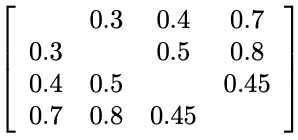

## For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

## (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram

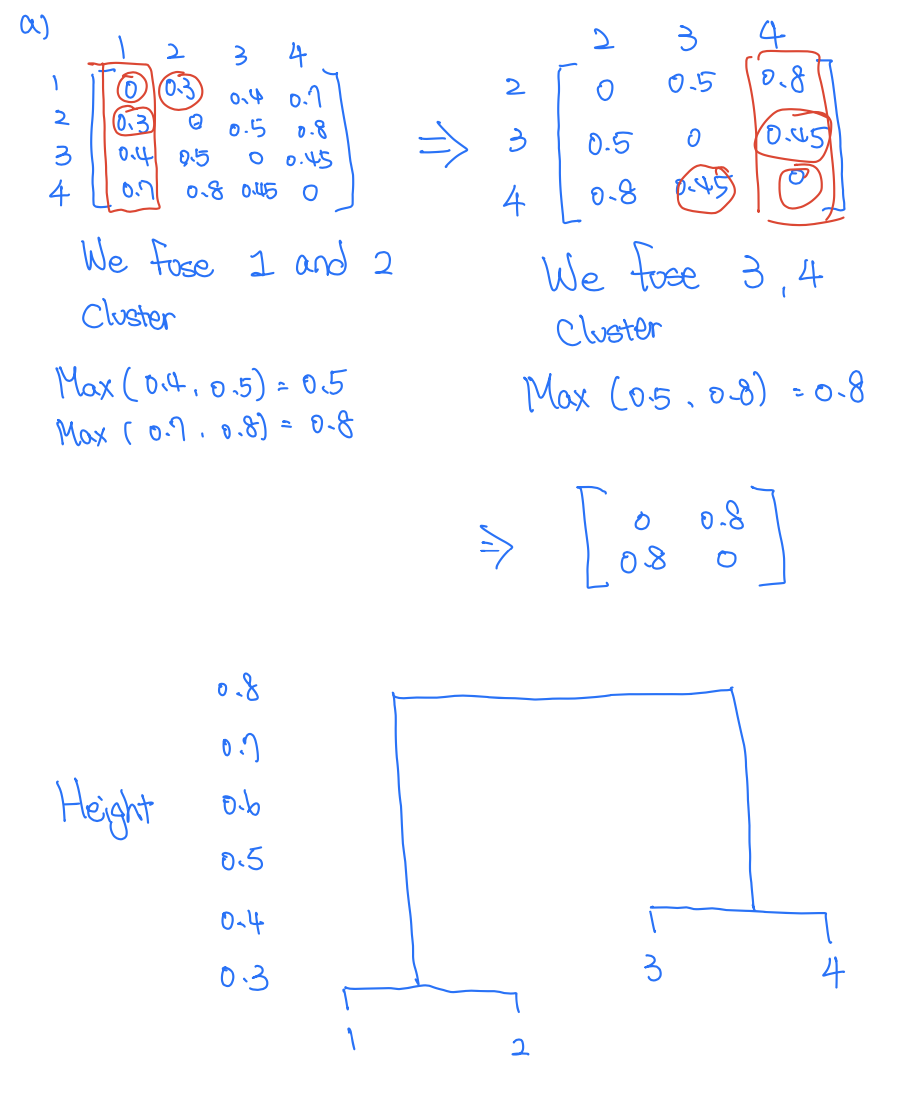

## (b) Repeat (a), this time using single linkage clustering.

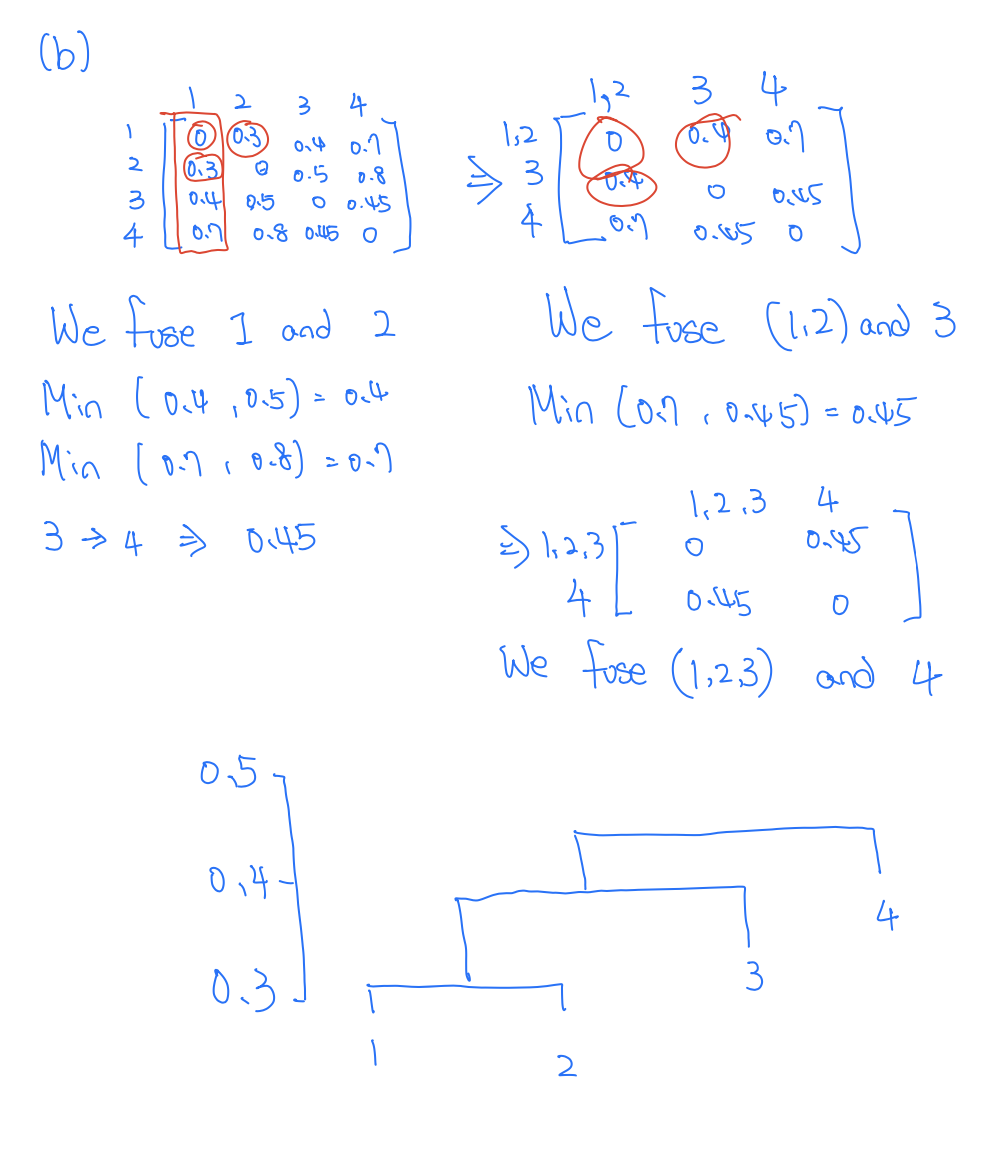

## (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

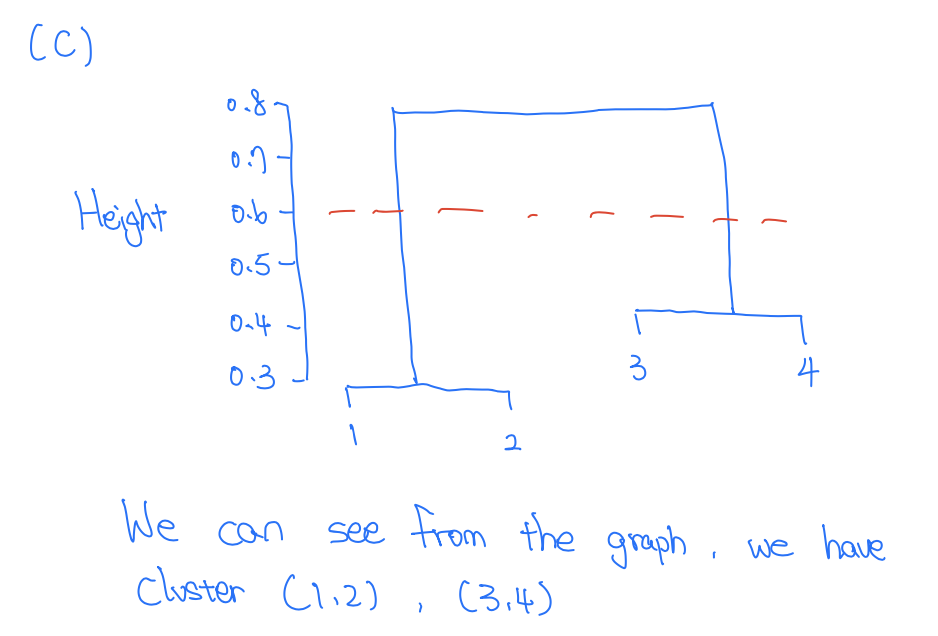

## (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

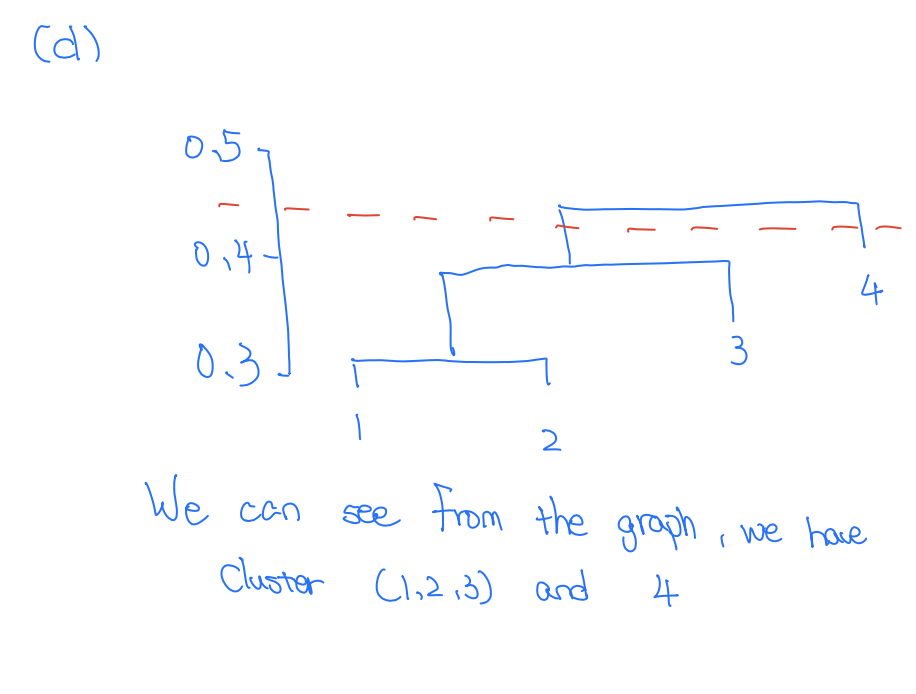

## (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

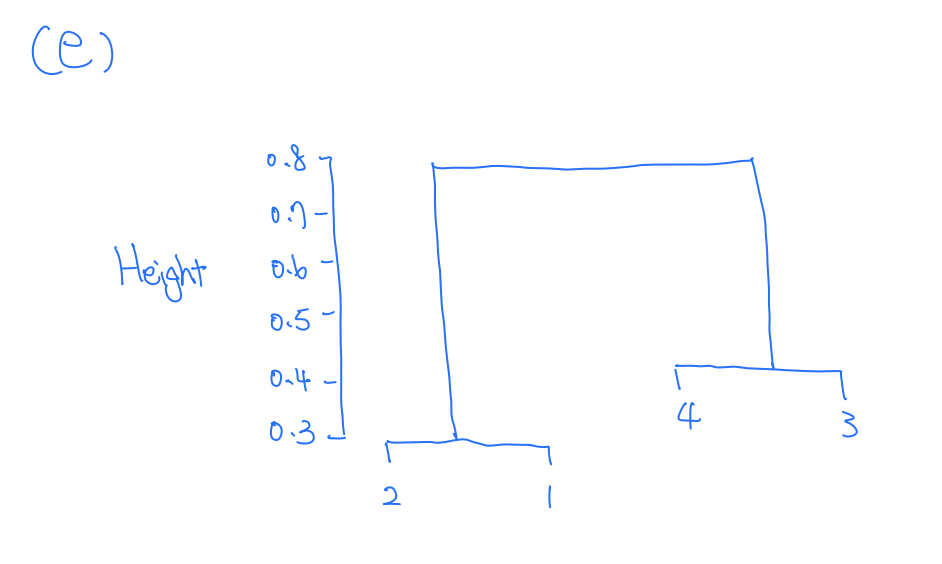

# Reference:

https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value

https://stats.stackexchange.com/questions/336820/what-is-a-hamming-loss-will-we-consider-it-for-an-imbalanced-binary-classifier

https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/HammingLoss#:~:text=Hamming%20loss%20is%20the%20fraction,penalizes%20only%20the%20individual%20labels.

## Piazza posts